In [1]:
#Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: Sepal and Petal measurements
y = iris.target  # Labels: Species (Setosa=0, Versicolor=1, Virginica=2)

In [3]:
# Step 3: Explore the data (optional step to understand the dataset)
# Convert the dataset into a DataFrame for easier exploration
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['species'])

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


In [4]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 5: Standardize the features (this helps with many ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Step 6: Train the model (Support Vector Machine in this case)
model = SVC(kernel='linear')  # You can try other kernels as well, e.g., 'rbf'
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

In [8]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [9]:
# Print the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 97.78%

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [10]:
# Step 9: Classification report for additional metrics (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



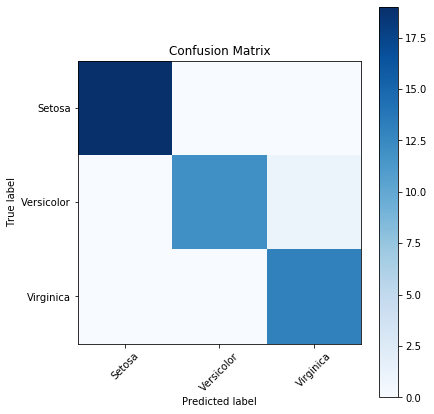

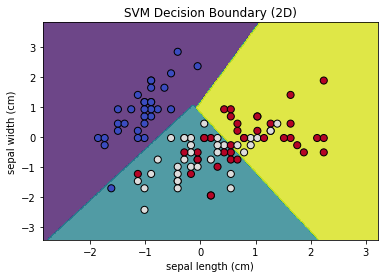

In [11]:
# Step 10: Visualize the results (Optional)
# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Setosa', 'Versicolor', 'Virginica']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Optional: Visualize decision boundaries (Only for 2D features for simplicity)
# For visualization, we'll use only two features: Sepal Length and Sepal Width

X_train_2d = X_train[:, :2]  # Using only the first two features
X_test_2d = X_test[:, :2]

model_2d = SVC(kernel='linear')
model_2d.fit(X_train_2d, y_train)

# Create a mesh grid to plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary (2D)')

plt.show()
